 #  A Whale off the Port(folio)

Evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
# imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

Read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_data = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_data.sort_index(inplace = True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_data = whale_data.dropna()
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_data.sort_index(inplace = True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_data = algo_data.dropna()
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

S&P500 Historic Closing Prices and new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

sp500_data = pd.read_csv(sp500_history_csv, index_col ="Date", infer_datetime_format = True, parse_dates = True)
sp500_data.sort_index(inplace = True)
sp500_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_data['Close'] = sp500_data['Close'].str.replace('$','')
sp500_data['Close'] = sp500_data['Close'].astype('float')
sp500_data.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_data = sp500_data.pct_change()
sp500_data.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_data = sp500_data.dropna()
sp500_data.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
sp500_data.columns = ["S&P 500"]
sp500_data.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
combined_wh_al_sp = pd.concat([whale_data, algo_data, sp500_data], axis = 'columns', join = 'inner')
combined_wh_al_sp.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Portfolio Analysis

Calculate and visualize performance and risk metrics for the portfolios.

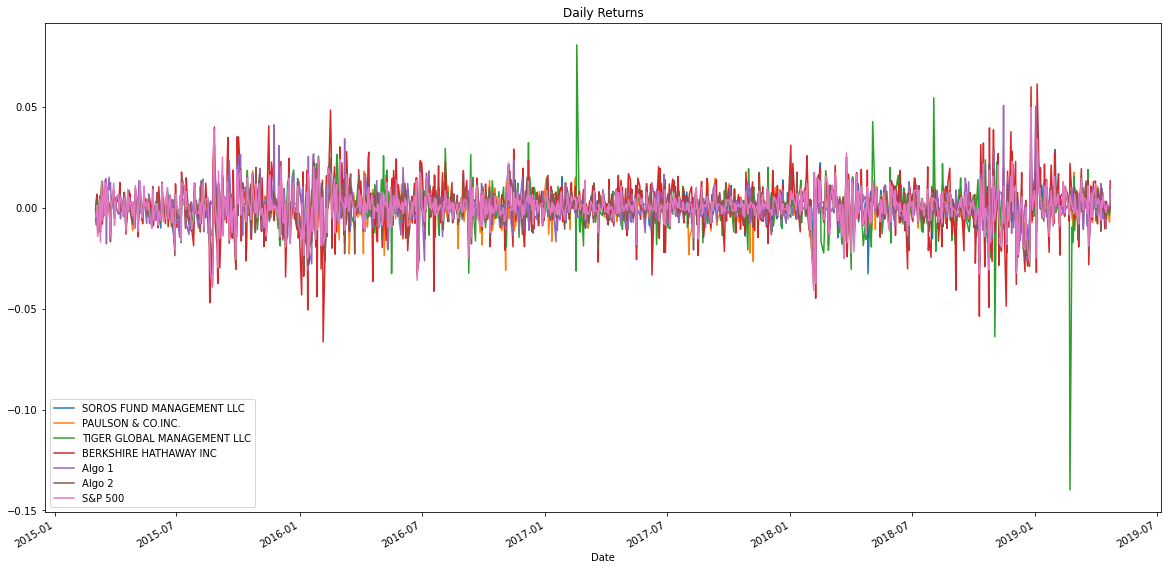

In [15]:
# Plot daily returns
combined_wh_al_sp.plot(figsize = (20,10), title = 'Daily Returns')

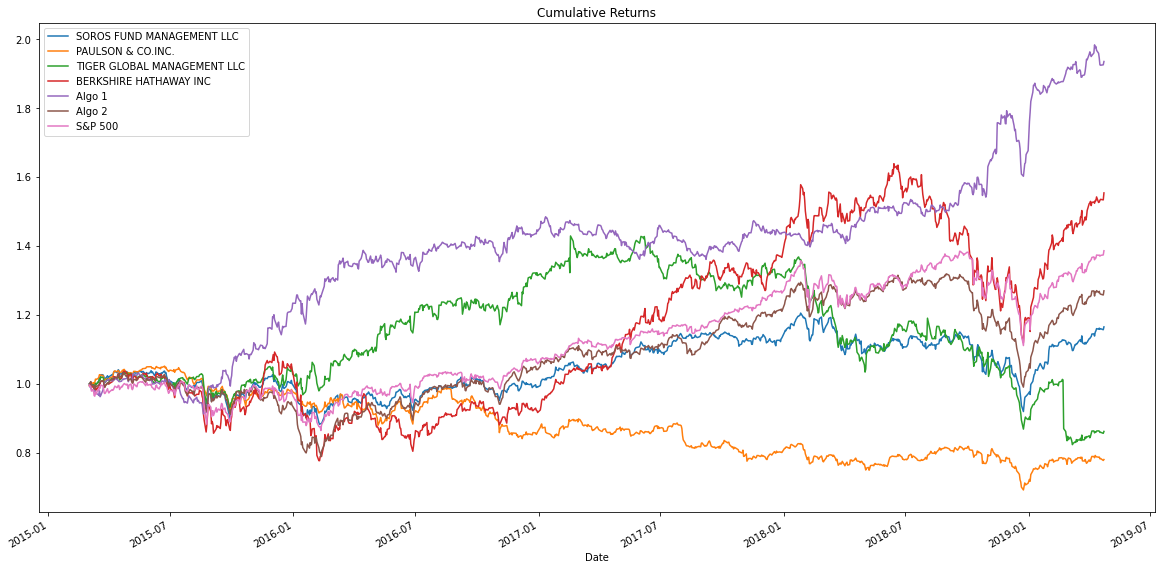

In [16]:
# Plot cumulative returns
combined_wh_al_sp_cumulative_returns = (1 + combined_wh_al_sp).cumprod()
combined_wh_al_sp_cumulative_returns.plot(figsize = (20,10), title = 'Cumulative Returns')

Does any portfolio outperform the S&P 500?

Berkshire and Algo 1 both outperform the S&P 500.

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

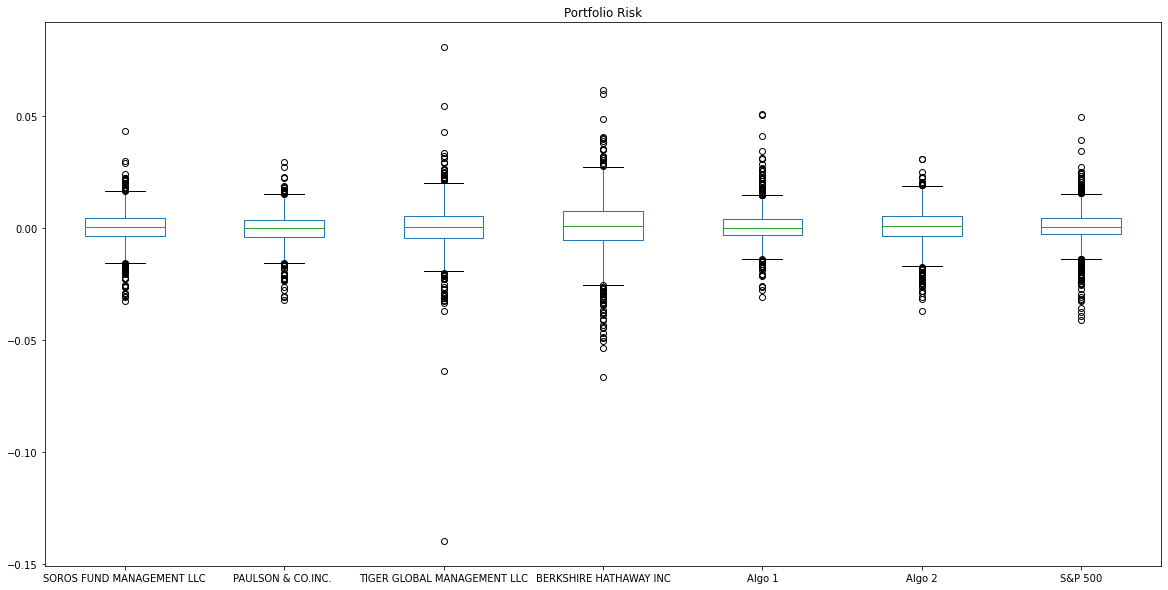

In [17]:
# Box plot to visually show risk
combined_wh_al_sp.plot.box(figsize = (20,10), title = 'Portfolio Risk')

Which box has the largest spread? Which has the smallest spread?

Berkshire has the largest spread and Algo 1 has narrowest spread.

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
combined_wh_al_sp_daily_std = combined_wh_al_sp.std()
combined_wh_al_sp_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
combined_wh_al_sp_daily_std > combined_wh_al_sp['S&P 500'].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

Which portfolios are riskier than the S&P 500?

Tiger Global Management and Berkshire are both riskier then the S&P 500.

In [20]:
# Calculate the annualized standard deviation (252 trading days)
combined_wh_al_sp_annual_std = combined_wh_al_sp.std() * np.sqrt(252)
combined_wh_al_sp_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

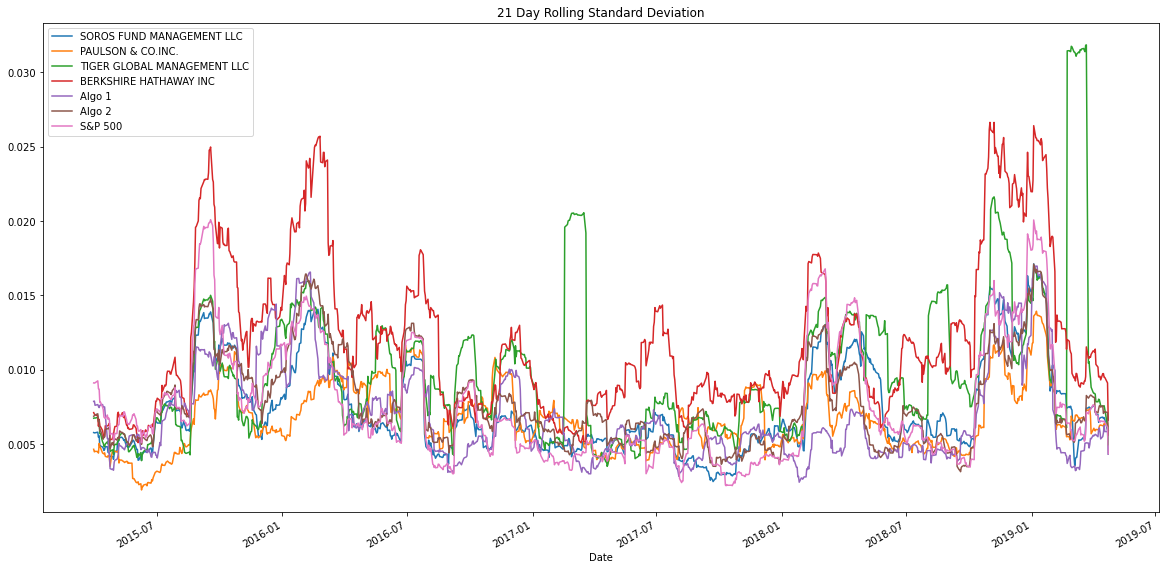

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_wh_al_sp.rolling(window = 21).std().plot(figsize = (20,10), title = '21 Day Rolling Standard Deviation')

Does the risk increase for each of the portfolios at the same time risk increases in the S&P?

For the most part as the risk for the S&P 500 increases so does the risk for the other portfolios.

In [22]:
# Construct a correlation table
combined_wh_al_sp_corr = combined_wh_al_sp.corr()
combined_wh_al_sp_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


Which returns most closely mimic the S&P?

Algo 2 closly mimic the S&P 500 returns the most.

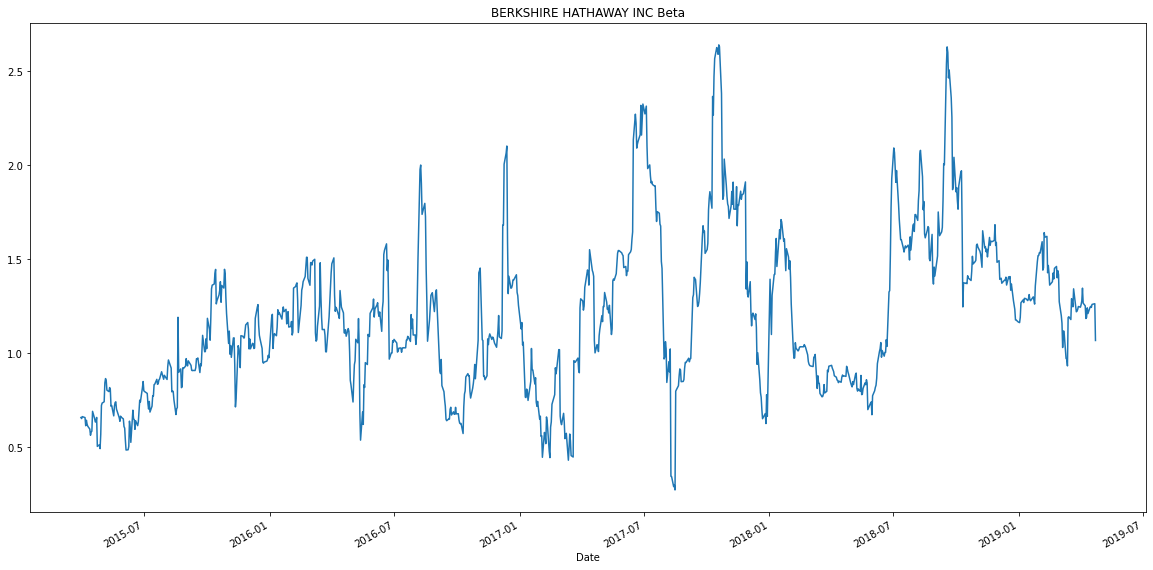

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
brk_port_cov = combined_wh_al_sp['BERKSHIRE HATHAWAY INC'].rolling(window = 21).cov(combined_wh_al_sp['S&P 500'])
variance = combined_wh_al_sp['S&P 500'].rolling(window = 21).var()
brk_port_beta = brk_port_cov / variance
brk_port_beta.plot(figsize = (20,10), title = 'BERKSHIRE HATHAWAY INC Beta')

Does the portfolio seem sensitive to movements in the S&P 500?

Berkshire does seem sensitive the the movements tot he S&P 500 but not by an ecsessive amount as the current Beta is close to 1.

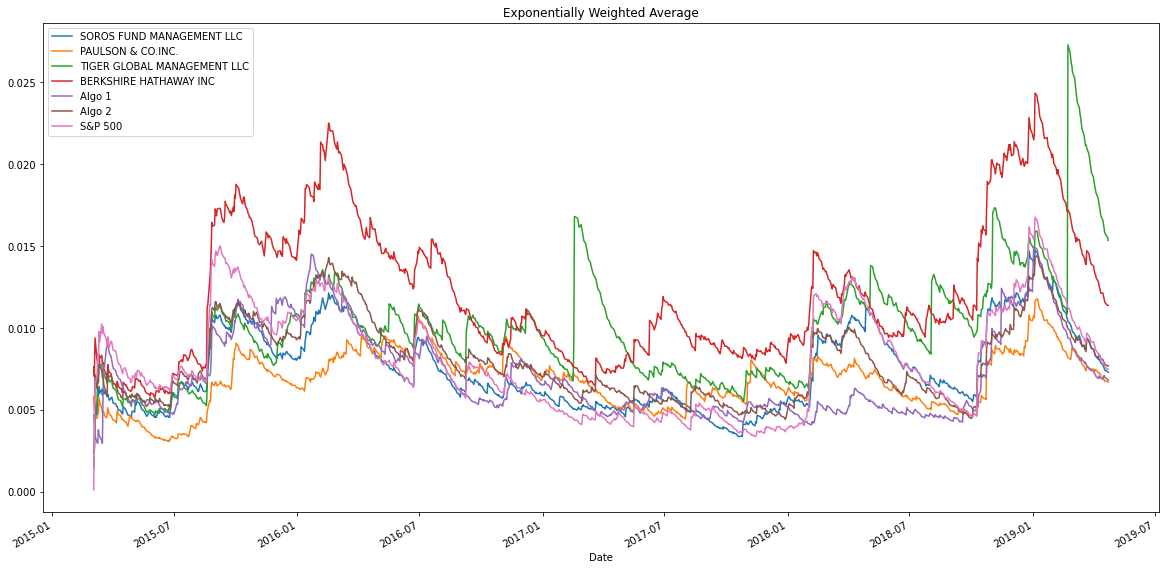

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_wh_al_sp.ewm(halflife=21).std().plot(figsize = (20,10), title= 'Exponentially Weighted Average')

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
combined_wh_al_sp_sharpe_annual = (combined_wh_al_sp.mean() * 252 ) / (combined_wh_al_sp.std() * np.sqrt(252))
combined_wh_al_sp_sharpe_annual

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

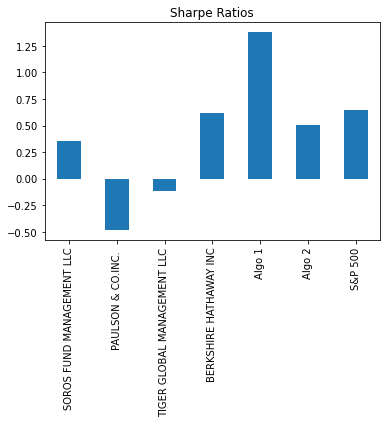

In [26]:
# Visualize the sharpe ratios as a bar plot
combined_wh_al_sp_sharpe_annual.plot(kind = 'bar', title = 'Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

On a risk adjusted basis (Sharpe ratio) the S&P 500 outperformed all porfolios with the exception of Berkshire which is almost a tie and Algo 1 which has by far best risk/reward characterisitcs for the current time frame.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock (AAPL)
#whale_returns_csv = Path("Resources/whale_returns.csv")

#whale_data = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
#whale_data.sort_index(inplace = True)
#whale_data.head()

aapl_history_csv = Path("Resources/aapl_history.csv")
aapl_history = pd.read_csv(aapl_history_csv, index_col = "Date", parse_dates = True)
aapl_history.sort_index(inplace = True)
aapl_history.columns = ["AAPL"]
aapl_history.head()

,AAPL
Date,
2018-05-11,47.15
2018-05-14,47.04
2018-05-15,46.61
2018-05-16,47.05
2018-05-17,46.75


In [29]:
# Read the second stock (AMZN)
amzn_history_csv = Path("Resources/amzn_history.csv")
amzn_history = pd.read_csv(amzn_history_csv, index_col = "Date", parse_dates = True)
amzn_history.sort_index(inplace = True)
amzn_history.columns = ["AMZN"]
amzn_history.head()

,AMZN
Date,
2018-05-11,1602.91
2018-05-14,1601.54
2018-05-15,1576.12
2018-05-16,1587.28
2018-05-17,1581.76


In [30]:
# Read the third stock
v_history_csv = Path("Resources/v_history.csv")
v_history = pd.read_csv(v_history_csv, index_col = "Date", parse_dates = True)
v_history.sort_index(inplace = True)
v_history.columns = ["V"]
v_history.head()

,V
Date,
2018-05-11,131.82
2018-05-14,131.21
2018-05-15,131.10
2018-05-16,130.89
2018-05-17,129.93


In [31]:
# Concatenate all stocks into a single DataFrame
combined_aapl_amzn_v = pd.concat([aapl_history, amzn_history, v_history], axis = 'columns', join = 'inner')
combined_aapl_amzn_v.head()

,AAPL,AMZN,V
Date,,,
2018-05-11,47.15,1602.91,131.82
2018-05-14,47.04,1601.54,131.21
2018-05-15,46.61,1576.12,131.10
2018-05-16,47.05,1587.28,130.89
2018-05-17,46.75,1581.76,129.93


In [32]:
# Reset the index


In [33]:
# Pivot so that each column of prices represents a unique symbol


In [34]:
# Drop Nulls
combined_aapl_amzn_v = combined_aapl_amzn_v.pct_change()
combined_aapl_amzn_v = combined_aapl_amzn_v.dropna()
combined_aapl_amzn_v.head()

,AAPL,AMZN,V
Date,,,
2018-05-14,-0.002333,-0.000855,-0.004628
2018-05-15,-0.009141,-0.015872,-0.000838
2018-05-16,0.009440,0.007081,-0.001602
2018-05-17,-0.006376,-0.003478,-0.007334
2018-05-18,-0.003636,-0.004672,0.000000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

custom_port = combined_aapl_amzn_v.dot(weights)
custom_port.head()

Date
2018-05-14   -0.002605
2018-05-15   -0.008617
2018-05-16    0.004973
2018-05-17   -0.005729
2018-05-18   -0.002769
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_aapl_amzn_v["Custom"] = custom_port
combined_wh_al_sp_custom = pd.concat([combined_wh_al_sp, combined_aapl_amzn_v["Custom"]], axis = 'columns', join = 'inner')
combined_wh_al_sp_custom.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,-0.002605
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.008617
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.004973
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.005729
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.002769


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_wh_al_sp_custom = combined_wh_al_sp_custom.dropna()

In [38]:
# Risk
combined_wh_al_sp_custom_annual_std = combined_wh_al_sp_custom.std() * np.sqrt(252)
combined_wh_al_sp_custom_annual_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.266693
dtype: float64

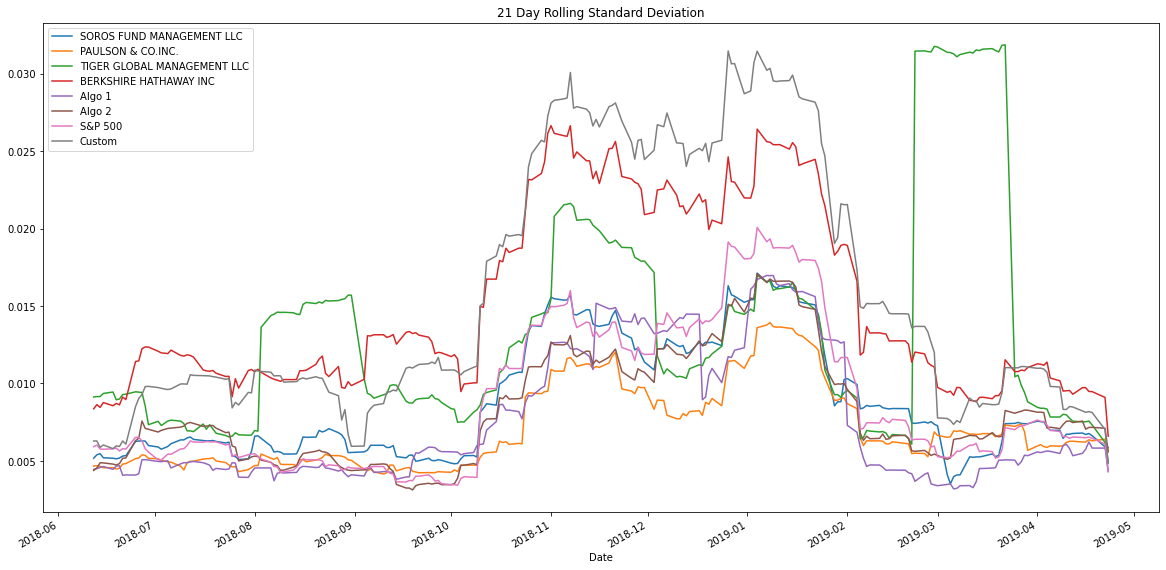

In [39]:
# Rolling
combined_wh_al_sp_custom.rolling(window = 21).std().plot(figsize = (20,10), title = '21 Day Rolling Standard Deviation')

In [40]:
# Annualized Sharpe Ratios
combined_wh_al_sp_custom_sharpe_annual = (combined_wh_al_sp_custom.mean() * 252) / (combined_wh_al_sp_custom.std() * np.sqrt(252))
combined_wh_al_sp_custom_sharpe_annual

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.807934
dtype: float64

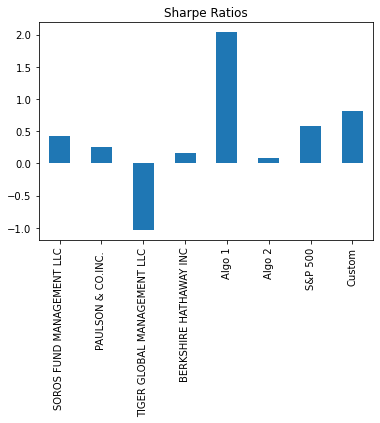

In [41]:
# Visualize the sharpe ratios as a bar plot
combined_wh_al_sp_custom_sharpe_annual.plot(kind = "bar", title = 'Sharpe Ratios')

In [42]:
# Create a correlation analysis
combined_wh_al_sp_custom_corr = combined_wh_al_sp_custom.corr()
combined_wh_al_sp_custom_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.755043
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.647678
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.359423
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.855093
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.315987
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.776583
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.880934
Custom,0.755043,0.647678,0.359423,0.855093,0.315987,0.776583,0.880934,1.000000


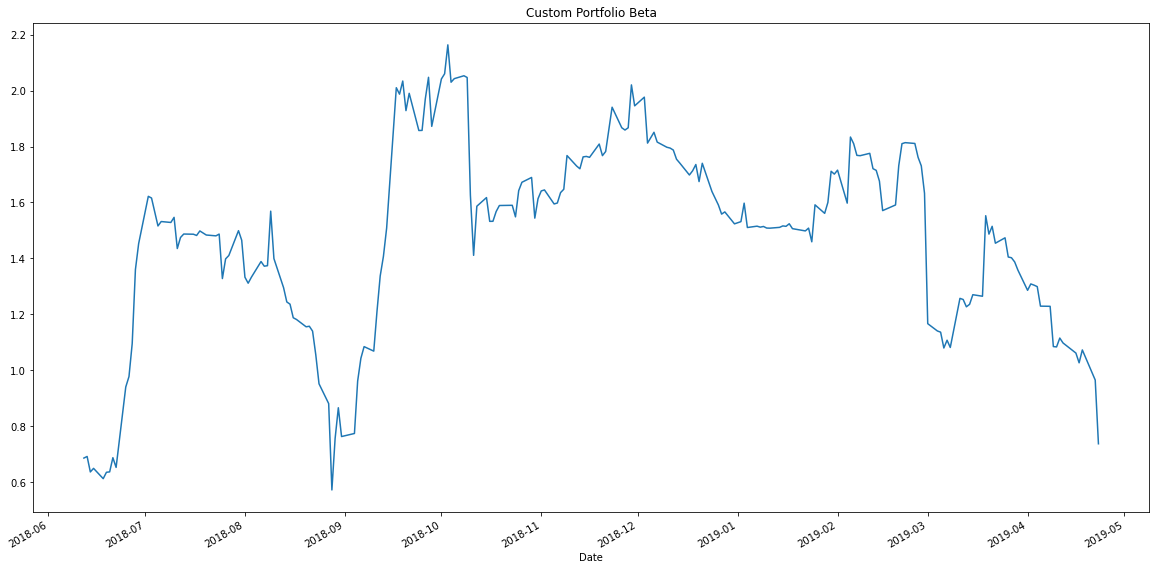

In [56]:
# Beta
custom_cov = combined_wh_al_sp_custom['Custom'].rolling(window = 21).cov(combined_wh_al_sp_custom['S&P 500'])
custom_beta = custom_cov / variance
custom_beta.plot(figsize = (20,10), title = 'Custom Portfolio Beta')


How does your portfolio fair?

The Custom portfolio has a consistantly high beta and averages around 1.5 for the time period. 